In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [19]:
df.drop(df[df.TotalCharges == " "].index,inplace=True)

In [22]:
df.TotalCharges = df.TotalCharges.astype('float')

In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

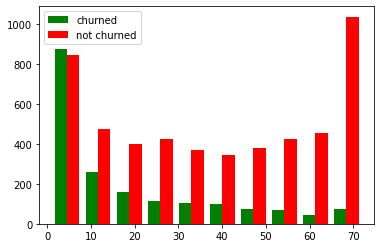

In [26]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churned','not churned'])
plt.legend()


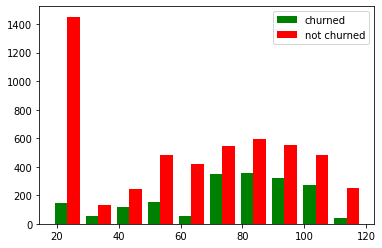

In [27]:
monthly_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([monthly_churn_yes,monthly_churn_no],color=['green','red'],label=['churned','not churned'])
plt.legend()


In [41]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [40]:
for col in df:
    if df[col].dtypes == 'object':
        print(f'{col} : {df[col].unique()}')

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [36]:
df.replace({'Yes':1,'No':0},inplace=True)

In [39]:
df.replace({'Male':1,'Female':0},inplace=True)

In [44]:
df2 = pd.get_dummies(data = df,columns=['InternetService','Contract','PaymentMethod'])

In [45]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [46]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [48]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df2.drop('Churn',axis='columns'),df2['Churn'],test_size=0.2,random_state=5)

In [50]:
X_train.shape

(5625, 26)

In [51]:
X_test.shape

(1407, 26)

In [53]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense( 20,input_shape=(26,) ,activation='relu'),
    keras.layers.Dense( 15 ,activation='relu'),
    keras.layers.Dense( 1 ,activation='sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.4795 - accuracy: 0.7687
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4254 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4205 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4166 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4136 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4103 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4091 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4073 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4076 - accura

In [54]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.4714 - accuracy: 0.7818


[0.4714220464229584, 0.7818052768707275]

In [55]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [56]:
yp

array([[0.13238752],
       [0.33420476],
       [0.00455497],
       ...,
       [0.716492  ],
       [0.692838  ],
       [0.8279917 ]], dtype=float32)

In [57]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.60       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.77      0.78      0.78      1407



<AxesSubplot: >

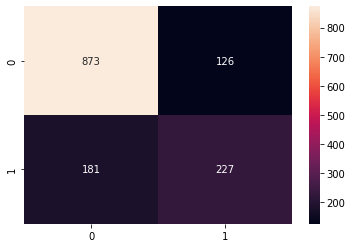

In [62]:
from seaborn import heatmap
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

heatmap(cm,annot=True,fmt='d')